## Prikaži _split_

Samo bilježnica za vizualizaciju _train/test splita_.

In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm

import os
from collections import defaultdict
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
 def coors(filename):
  with open(filename) as fp:
    f = fp.read()
    f = f.split(' ')
    f = f[5:7]
    f = [float(x) for x in f]
  return tuple(f)

In [4]:
def folders_to_coors(folder_name):
    """
    Vrati JEDINSTVENE koordinate.
    """
    coor_set = set()
    for file in tqdm(os.listdir(folder_name)):
        if file[-3:] == 'txt':
            coords = coors(f'{folder_name}/{file}')
            coor_set.add(coords)
    return coor_set

In [5]:
train_coors = folders_to_coors('/home/src/LUMEN-Interpretability/dataset/train/Amsterdam')
test_coors = folders_to_coors('/home/src/LUMEN-Interpretability/dataset/test/Amsterdam')

100%|██████████| 126316/126316 [00:16<00:00, 7882.16it/s]


In [6]:
train_coors = list(train_coors)
test_coors = list(test_coors)

In [15]:
BBox = ((4.8475, 4.9862,
         52.3432, 52.3935))

In [16]:
amsterdam_map = plt.imread('map.png')

In [11]:
x_train = [x[0] for x in train_coors]
y_train = [x[1] for x in train_coors]

x_test = [x[0] for x in test_coors]
y_test = [x[1] for x in test_coors]

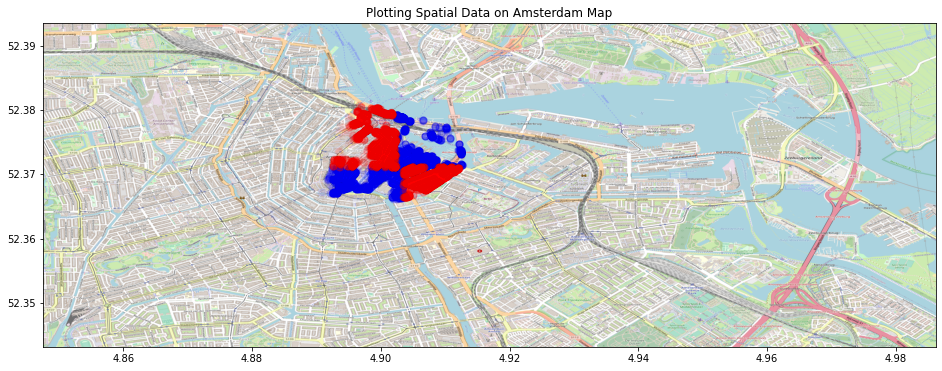

In [17]:
fig, ax = plt.subplots(figsize = (16,18))
ax.scatter(y_train, x_train, zorder=1, alpha= 0.05, c='b', s=50)
ax.scatter(y_test, x_test, zorder=1, alpha= 0.05, c='r', s=50)
ax.set_title('Plotting Spatial Data on Amsterdam Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(amsterdam_map, zorder=0, extent = BBox, aspect= 'equal')